In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import MeanShift,estimate_bandwidth
from sklearn.preprocessing  import LabelEncoder



In [15]:
df=pd.read_csv("World_happiness.csv")
df

,Overall rank,Country or region,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
0,1,Finland,7.769,1.340,1.587,0.986,0.596,0.153,0.393
1,2,Denmark,7.600,1.383,1.573,0.996,0.592,0.252,0.410
2,3,Norway,7.554,1.488,1.582,1.028,0.603,0.271,0.341
3,4,Iceland,7.494,1.380,1.624,1.026,0.591,0.354,0.118
4,5,Netherlands,7.488,1.396,1.522,0.999,0.557,0.322,0.298
...,...,...,...,...,...,...,...,...,...
151,152,Rwanda,3.334,0.359,0.711,0.614,0.555,0.217,0.411
152,153,Tanzania,3.231,0.476,0.885,0.499,0.417,0.276,0.147
153,154,Afghanistan,3.203,0.350,0.517,0.361,0.000,0.158,0.025
154,155,Central African Republic,3.083,0.026,0.000,0.105,0.225,0.235,0.035


In [16]:
label=LabelEncoder()
for i in df.select_dtypes(include=["object"]):
    df[i]=label.fit_transform(df[i])

In [17]:
x=df

In [18]:
bandwidth=estimate_bandwidth(x,quantile=0.2)
bandwidth

np.float64(46.67893722928113)

In [19]:
model=MeanShift(bandwidth=bandwidth)
model.fit(x)

,"bandwidth bandwidth: float, default=NoneBandwidth used in the flat kernel.If not given, the bandwidth is estimated usingsklearn.cluster.estimate_bandwidth; see the documentation for thatfunction for hints on scalability (see also the Notes, below).",np.float64(46.67893722928113)
,"seeds seeds: array-like of shape (n_samples, n_features), default=NoneSeeds used to initialize kernels. If not set,the seeds are calculated by clustering.get_bin_seedswith bandwidth as the grid size and default values forother parameters.",None
,"bin_seeding bin_seeding: bool, default=FalseIf true, initial kernel locations are not locations of allpoints, but rather the location of the discretized version ofpoints, where points are binned onto a grid whose coarsenesscorresponds to the bandwidth. Setting this option to True will speedup the algorithm because fewer seeds will be initialized.The default value is False.Ignored if seeds argument is not None.",False
,"min_bin_freq min_bin_freq: int, default=1To speed up the algorithm, accept only those bins with at leastmin_bin_freq points as seeds.",1
,"cluster_all cluster_all: bool, default=TrueIf true, then all points are clustered, even those orphans that arenot within any kernel. Orphans are assigned to the nearest kernel.If false, then orphans are given cluster label -1.",True
,"n_jobs n_jobs: int, default=NoneThe number of jobs to use for the computation. The following tasks benefitfrom the parallelization:- The search of nearest neighbors for bandwidth estimation and label assignments. See the details in the docstring of the ``NearestNeighbors`` class.- Hill-climbing optimization for all seeds.See :term:`Glossary ` for more details.``None`` means 1 unless in a :obj:`joblib.parallel_backend` context.``-1`` means using all processors. See :term:`Glossary `for more details.",None
,"max_iter max_iter: int, default=300Maximum number of iterations, per seed point before the clusteringoperation terminates (for that seed point), if has not converged yet... versionadded:: 0.22",300


In [23]:
n=model.cluster_centers_

In [24]:
m=model.labels_

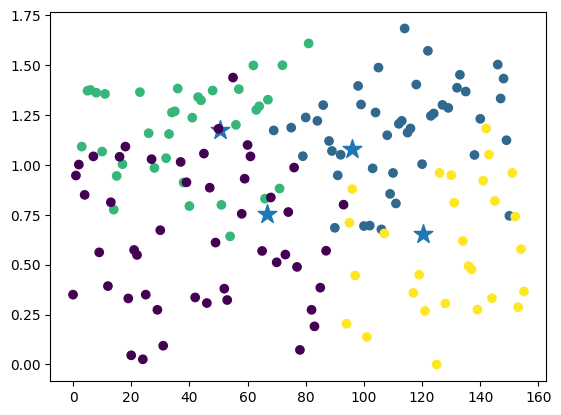

In [25]:
plt.scatter(n[:,1],n[:,3],marker="*",s=200)
plt.scatter(df["Country or region"],df["GDP per capita"],c=m)
plt.show()

In [30]:
new=np.array([[1448,14.53,27.57,0.90,961,0.960,0.65,0.253,0.353]])
j=model.predict(new)
j

c:\Users\AKASH\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2691: UserWarning: X does not have valid feature names, but MeanShift was fitted with feature names
  warnings.warn(


array([3])